In [1]:
# importing libraries and dependancies: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv('S&TComments.csv',error_bad_lines=False
                        ,encoding='latin1'
                        
                        #, cyrillic encoding='latin1'
                       )
#pd.read_csv('commedy_comment.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dopba\AppData\Roaming\nltk_data...


In [2]:
data.head()

,video_id,comment
0,0PZzqQYvPwI,Sir kindly make a video explaining maps you ha...
1,0PZzqQYvPwI,Thanks a lot sir. Much needed lecture.
2,0PZzqQYvPwI,Thanks sir...?????
3,0PZzqQYvPwI,"IRNSS- NAViC,GNNS:-GPS,BEIDOU,GLONASS,GALLILIO"
4,0PZzqQYvPwI,"1:11:55- ROCKETRY, it is an upcoming movie abo..."


In [3]:
data.shape

(17500, 2)

In [4]:
data = data.dropna()

In [5]:
data.shape

(17500, 2)

Since only a few rows (18) had missing data, I found it better to drop those and work on the remaining data

In [6]:
data.dtypes

video_id    object
comment     object
dtype: object

In [8]:
data['comment'].head()

0    Sir kindly make a video explaining maps you ha...
1               Thanks a lot sir. Much needed lecture.
2                                   Thanks sir...?????
3       IRNSS- NAViC,GNNS:-GPS,BEIDOU,GLONASS,GALLILIO
4    1:11:55- ROCKETRY, it is an upcoming movie abo...
Name: comment, dtype: object

In [9]:

sia = SentimentIntensityAnalyzer()

In [10]:
data['negative'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['neg'])
data['neutral'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['neu'])
data['positive'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['pos'])
data['compound'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['compound'])

In [11]:
data.head()

,video_id,comment,negative,neutral,positive,compound
0,0PZzqQYvPwI,Sir kindly make a video explaining maps you ha...,0.0,0.775,0.225,0.4939
1,0PZzqQYvPwI,Thanks a lot sir. Much needed lecture.,0.0,0.633,0.367,0.4404
2,0PZzqQYvPwI,Thanks sir...?????,0.0,0.206,0.794,0.5940
3,0PZzqQYvPwI,"IRNSS- NAViC,GNNS:-GPS,BEIDOU,GLONASS,GALLILIO",0.0,1.000,0.000,0.0000
4,0PZzqQYvPwI,"1:11:55- ROCKETRY, it is an upcoming movie abo...",0.0,1.000,0.000,0.0000


In [12]:
# Counting the positive, negative and neutral reviews : 

positive_reviews = np.sum(i > 0.4 for i in data['compound'])
neutral_reviews = np.sum(-0.4 < i < 0.4 for i in data['compound'])
negative_reviews = np.sum(i < -0.4 for i in data['compound'])
n = len(data['compound'])

C:\Users\dopba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dopba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.
C:\Users\dopba\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


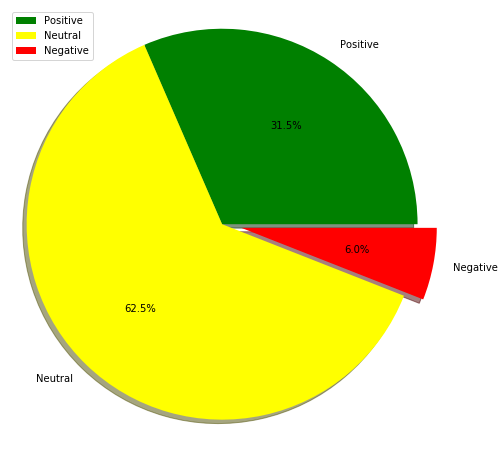

In [13]:

labels = 'Positive', 'Neutral', 'Negative'
sizes = [(positive_reviews * 100)/n, (neutral_reviews * 100)/n, (negative_reviews * 100)/n]
colors = ['green', 'yellow', 'red']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize =(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.axis('equal') 
plt.legend()
plt.show()

In [15]:
from wordcloud import WordCloud, STOPWORDS

In [17]:
stopwords = set(STOPWORDS)
text = " ".join(i for i in data['comment'])

In [18]:
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 1030358 words in the combination of all reviews.


In [19]:
# Generating a wordcloud image: 
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=100).generate(text)

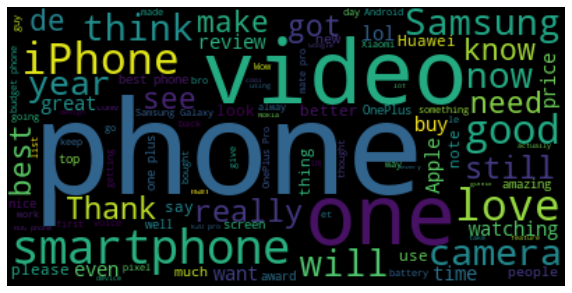

In [20]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()